In [19]:
#Importing relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import ipywidgets as widgets

#Load Data
data = pd.read_csv(r"C:\Users\Resenbro\Desktop\stud.polit\8. Semester\Python\spillere.csv")


#Choosing relevant variables
variable = ['name','position','current_salary','weight',"height"]
data=data[variable]

#Removing all data of players with missing heights, weights or salaries
data = data.dropna(subset=["height"])
data=data.dropna(subset=["current_salary"])
data=data.dropna(subset=["weight"])

#Creating function to convert feet-inches to centimeters 
def calcAmericanHeightToCM(x):
    x = str(x)
    m = x.split("-")
    cm = float(m[0])*30.48 + float(m[1]) * 2.54 
    return(cm)

#Calling the function to convert the height from feet-inches to centimeters
data['height'] = data.height.apply(calcAmericanHeightToCM)

#Removing commas from salaries
data["current_salary"]=data["current_salary"].str.replace(',','') 

#Choosing columns with numeric values
cols = ['current_salary','weight',"height"]  

#Converting columns to numeric values
for col in cols: 
    data[col] = pd.to_numeric(data[col]) 

#Converting weight from pounds to kilos
data["weight"]=data["weight"]*0.45359237 

#Simplifying Positions 
#Linebackers
data["position"]=data["position"].replace({"OLB":"LB","ILB":"LB","LB-DE":"LB"})
#Defensive Backs
data["position"]=data["position"].replace({"S":"DB","CB":"DB","SS":"DB","FS":"DB"})
#Defensive Linemen
data["position"]=data["position"].replace({"DT":"DL","DE":"DL","NT":"DL","DE-C":"DL"})
#Offensive Linemen
data["position"]=data["position"].replace({"G":"OL","T":"OL","OT":"OL","OG":"OL","LS":"OL","LS,TE":"OL","C":"OL"})
#Skill Positions
data["position"]=data["position"].replace({"WR":"SP","RB":"SP","FB":"SP","TE":"SP","WR/RB":"SP"})
#Special Teams
data["position"]=data["position"].replace({"K":"ST","P":"ST"})



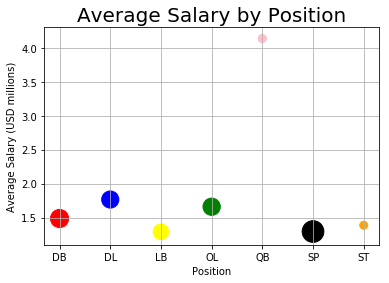

In [20]:
#Calculating average salary by position
loen=data.groupby('position')["current_salary"].mean()
#Creating array with just position names
positioner=data.position.unique()
positioner=sorted(positioner)
#Counting amount of players in each position
tael_positioner=data.groupby('position')["name"].nunique()
#Plot
farver=('red','blue','yellow','green','pink','black','orange')
plt.scatter(positioner, loen/1000000, s=tael_positioner*1,c=farver)
plt.xlabel("Position")
plt.ylabel("Average Salary (USD millions)")
plt.title("Average Salary by Position",fontsize=20)
plt.grid(True)



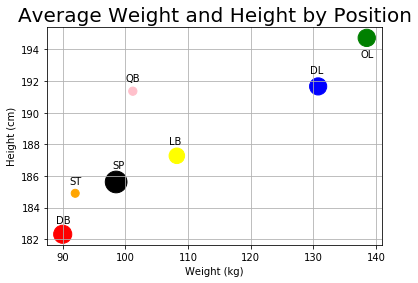

In [21]:
#Calculating average height and weight by position 
hoejde=data.groupby('position')["height"].mean()
vaegt=data.groupby('position')["weight"].mean()

#Plot
plt.scatter(vaegt,hoejde,s=tael_positioner,c=farver)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Average Weight and Height by Position", fontsize=20)
plt.grid(True)
plt.text(100,192,"QB")
plt.text(89,183,"DB")
plt.text(91,185.5,"ST")
plt.text(98,186.5,"SP")
plt.text(107,188,"LB")
plt.text(129.5,192.5,"DL")
plt.text(137.5,193.5,"OL")
plt.show()

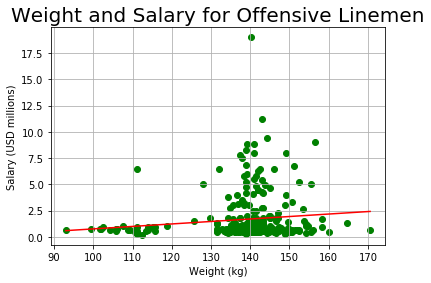

In [26]:
#Creating a dataset only countaining offensive linemen
OLdata=data.loc[data["position"]=="OL"]
OLdata.loc[:,"current_salary"]=OLdata["current_salary"].copy()/1000000

#Plot 
plt.scatter(OLdata["weight"],OLdata["current_salary"],c="green")
plt.xlabel("Weight (kg)")
plt.ylabel("Salary (USD millions)")
plt.title("Weight and Salary for Offensive Linemen",fontsize=20)
plt.grid(True)

#Adding trend line 
plt.plot(np.unique(OLdata["weight"]), np.poly1d(np.polyfit(OLdata["weight"], OLdata["current_salary"], 1))(np.unique(OLdata["weight"])),c="red")
plt.show()

In [24]:
#Assigning dependent variable Y to salary and explanatory variable X to weight and adding constant
Y = np.array(OLdata["current_salary"])
X = np.array(OLdata["weight"])
X = sm.add_constant(X)

#Estimating OLS
results = sm.OLS(Y, X).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.252
Date:                Fri, 22 Mar 2019   Prob (F-statistic):             0.0401
Time:                        12:09:37   Log-Likelihood:                -657.00
No. Observations:                 299   AIC:                             1318.
Df Residuals:                     297   BIC:                             1325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6061      1.589     -1.011      0.3

In [25]:
#Defining function to make the known graph of weight and height averages but with an added scatterpoint ("you")
def punkt(b,c):
    
    plt.scatter(c,b,s=100)
    plt.text(c+1,b,"You")
    
    plt.scatter(vaegt,hoejde,s=tael_positioner,c=farver)
    plt.xlabel("Weight (kg)")
    plt.ylabel("Height (cm)")
    plt.title("Average Weight and Height by Position", fontsize=20)
    plt.grid(True)
    plt.text(100,192,"QB")
    plt.text(89,183,"DB")
    plt.text(91,185.5,"ST")
    plt.text(98,186.5,"SP")
    plt.text(107,188,"LB")
    plt.text(129.5,192.5,"DL")
    plt.text(137.5,193.5,"OL")
    
#Making a widget to change the point "you" in the graph. The point changes as weight and height changes.  
import ipywidgets as widgets
widgets.interact(punkt,
    X=widgets.fixed(X),
    b=widgets.FloatSlider(description="Height", min=140, max=220, step=1, value=180),
    c=widgets.FloatSlider(description="Weight", min=40, max=200, step=1, value=75)
    );

interactive(children=(FloatSlider(value=180.0, description='Height', max=220.0, min=140.0, step=1.0), FloatSli…